In [1]:
!pip install requests beautifulsoup4 pandas matplotlib seaborn wordcloud


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


C:\Users\HP\miniconda3\envs\py312\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
pip install chardet


Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
base_url = "http://books.toscrape.com/catalogue/page-{}.html"


In [3]:
titles = []
prices = []
ratings = []


In [4]:
for page_num in range(1, 6):  # scraping 5 pages
    url = base_url.format(page_num)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    books = soup.find_all('article', class_='product_pod')
    
    for book in books:
        title = book.h3.a['title']
        price = float(book.find('p', class_='price_color').text[1:])
        rating = book.p['class'][1]
        
        titles.append(title)
        prices.append(price)
        ratings.append(rating)


In [5]:
df = pd.DataFrame({
    "title": titles,
    "price": prices,
    "rating": ratings
})
df.head()


,title,price,rating
0,A Light in the Attic,51.77,Three
1,Tipping the Velvet,53.74,One
2,Soumission,50.10,One
3,Sharp Objects,47.82,Four
4,Sapiens: A Brief History of Humankind,54.23,Five


In [6]:
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}
df["rating_num"] = df["rating"].map(rating_map)


In [7]:
df.sort_values(by="price", ascending=False).head(10)


,title,price,rating,rating_num
68,The Death of Humanity: and the Case for Life,58.11,Four,4
40,Slow States of Collapse: Poems,57.31,Three,3
15,Our Band Could Be Your Life: Scenes from the A...,57.25,Three,3
58,The Past Never Ends,56.50,Four,4
57,The Pioneer Woman Cooks: Dinnertime: Comfort C...,56.41,One,1
91,Masks and Shadows,56.40,Two,2
56,The Secret of Dreadwillow Carse,56.13,One,1
67,The Electric Pencil: Drawings from Inside Stat...,56.06,One,1
25,Birdsong: A Story in Pictures,54.64,Three,3
4,Sapiens: A Brief History of Humankind,54.23,Five,5


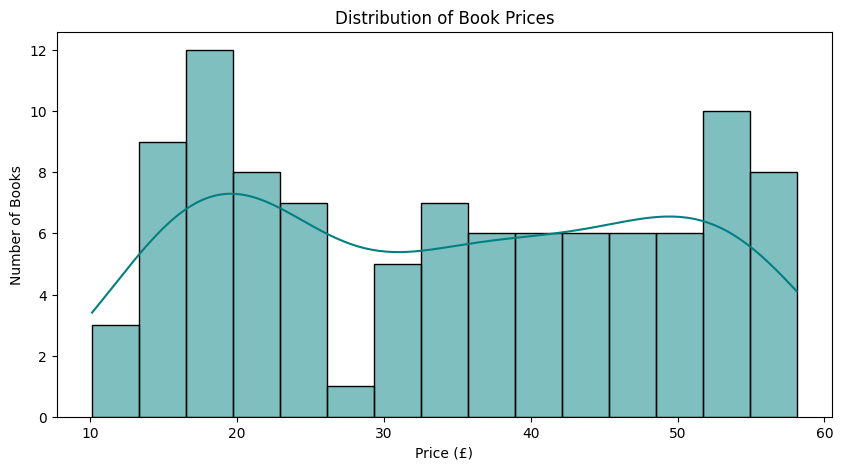

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df["price"], bins=15, kde=True, color="teal")
plt.title("Distribution of Book Prices")
plt.xlabel("Price (£)")
plt.ylabel("Number of Books")
plt.show()


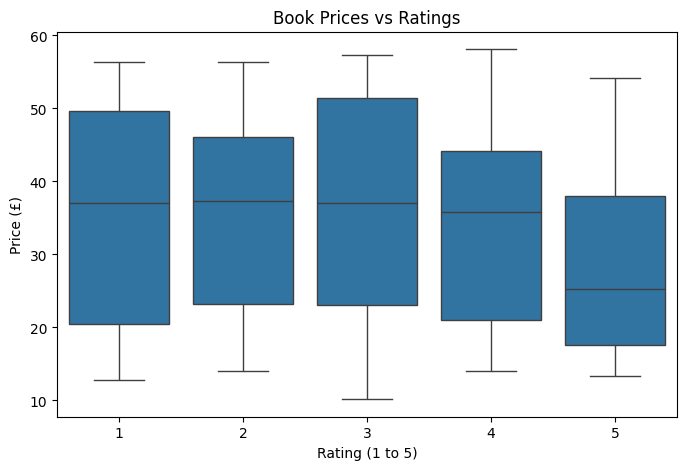

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="rating_num", y="price", data=df)
plt.title("Book Prices vs Ratings")
plt.xlabel("Rating (1 to 5)")
plt.ylabel("Price (£)")
plt.show()


In [10]:
high_rated = df[df["rating_num"] >= 4]
high_rated.head()


,title,price,rating,rating_num
3,Sharp Objects,47.82,Four,4
4,Sapiens: A Brief History of Humankind,54.23,Five,5
6,The Dirty Little Secrets of Getting Your Dream...,33.34,Four,4
8,The Boys in the Boat: Nine Americans and Their...,22.60,Four,4
11,Shakespeare's Sonnets,20.66,Four,4


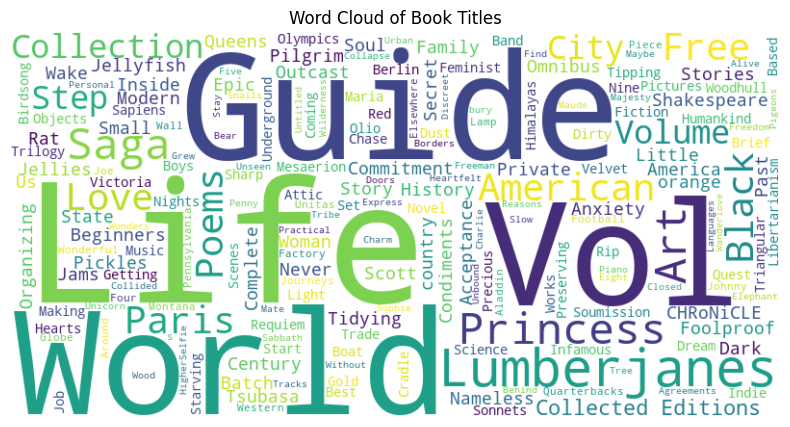

In [11]:
all_titles = " ".join(df["title"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_titles)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Book Titles")
plt.show()


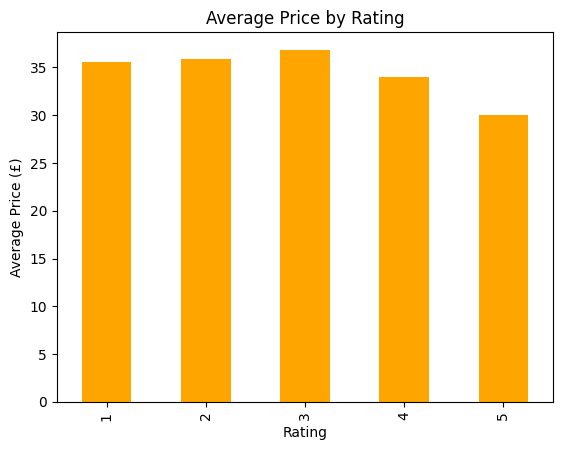

In [12]:
df.groupby("rating_num")["price"].mean().plot(kind='bar', color="orange")
plt.title("Average Price by Rating")
plt.ylabel("Average Price (£)")
plt.xlabel("Rating")
plt.show()


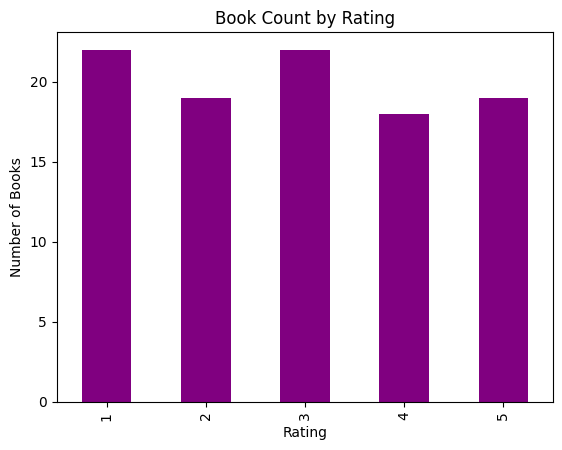

In [13]:
df["rating_num"].value_counts().sort_index().plot(kind='bar', color="purple")
plt.title("Book Count by Rating")
plt.ylabel("Number of Books")
plt.xlabel("Rating")
plt.show()


In [14]:
df.isnull().sum()


title         0
price         0
rating        0
rating_num    0
dtype: int64

In [15]:
df.to_csv("books.csv", index=False)


In [16]:
df.describe()


,price,rating_num
count,100.000000,100.000000
mean,34.560700,2.930000
std,14.638531,1.423149
min,10.160000,1.000000
25%,19.897500,2.000000
50%,34.775000,3.000000
75%,47.967500,4.000000
max,58.110000,5.000000


In [17]:
df[df["rating_num"] == 5][["title", "price"]].head()


,title,price
4,Sapiens: A Brief History of Humankind,54.23
12,Set Me Free,17.46
13,Scott Pilgrim's Precious Little Life (Scott Pi...,52.29
14,Rip it Up and Start Again,35.02
23,Chase Me (Paris Nights #2),25.27


In [18]:
df["price_category"] = pd.cut(df["price"], bins=[0, 20, 40, 60], labels=["Low", "Medium", "High"])
df.head()


,title,price,rating,rating_num,price_category
0,A Light in the Attic,51.77,Three,3,High
1,Tipping the Velvet,53.74,One,1,High
2,Soumission,50.10,One,1,High
3,Sharp Objects,47.82,Four,4,High
4,Sapiens: A Brief History of Humankind,54.23,Five,5,High


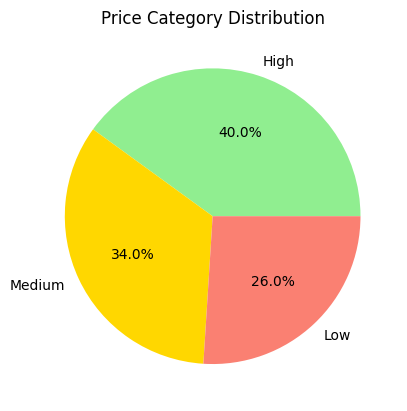

In [19]:
df["price_category"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightgreen", "gold", "salmon"])
plt.title("Price Category Distribution")
plt.ylabel("")
plt.show()
